In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


# Comparative Visual Model Analysis
This notebook is dedicated to a comparative analysis of my five key models: Baseline, WaveNet1, WaveNet2, LSTM1, and LSTM2. The focus is on understanding the nuances of each model through a series of visual representations. I will use the audio output of the best performing model to generate a final music composition with the Jukebox pre-trained model.



### Imports

In [ ]:
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

### Pitch and Rhythm Variance Over Time

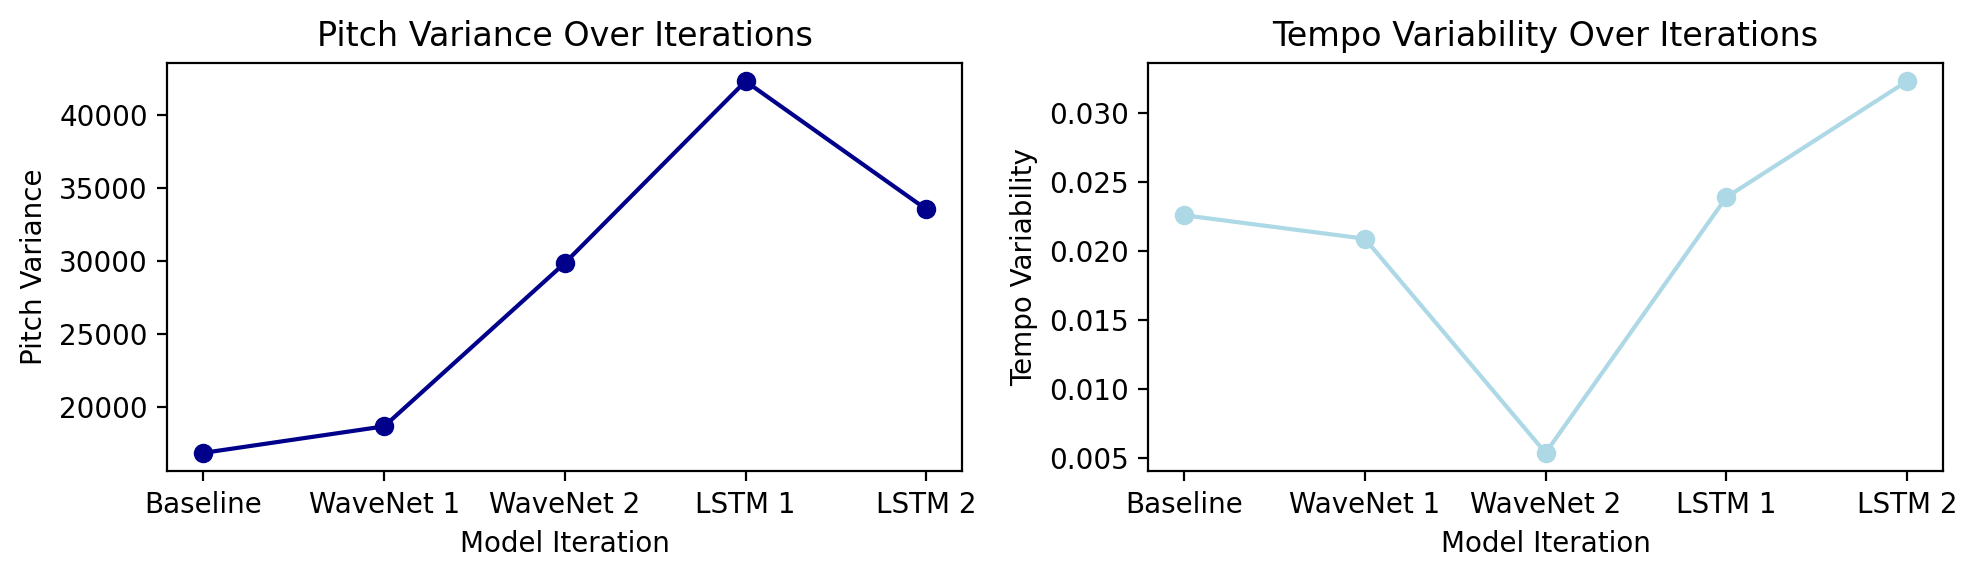

In [ ]:
data = {
    'Model Iteration': ['Baseline', 'WaveNet 1', 'WaveNet 2', 'LSTM 1', 'LSTM 2'],
    'Pitch Variance': [16859.758, 18672.857, 29845.777, 42279.527, 33523.45],
    'Tempo Variability': [0.0226, 0.0209, 0.0054, 0.0239, 0.0323]
}

df = pd.DataFrame(data)

# Plotting
plt.figure(figsize=(10, 3))

plt.subplot(1, 2, 1)
plt.plot(df['Model Iteration'], df['Pitch Variance'], marker='o', color='darkblue')
plt.title('Pitch Variance Over Iterations')
plt.xlabel('Model Iteration')
plt.ylabel('Pitch Variance')

plt.subplot(1, 2, 2)
plt.plot(df['Model Iteration'], df['Tempo Variability'], marker='o', color='lightblue')
plt.title('Tempo Variability Over Iterations')
plt.xlabel('Model Iteration')
plt.ylabel('Tempo Variability')

plt.tight_layout()
plt.show()


### Heatmaps for Model Performance
WaveNet2 performs the best across all metrics since pitch and tempo variance is the lowest.

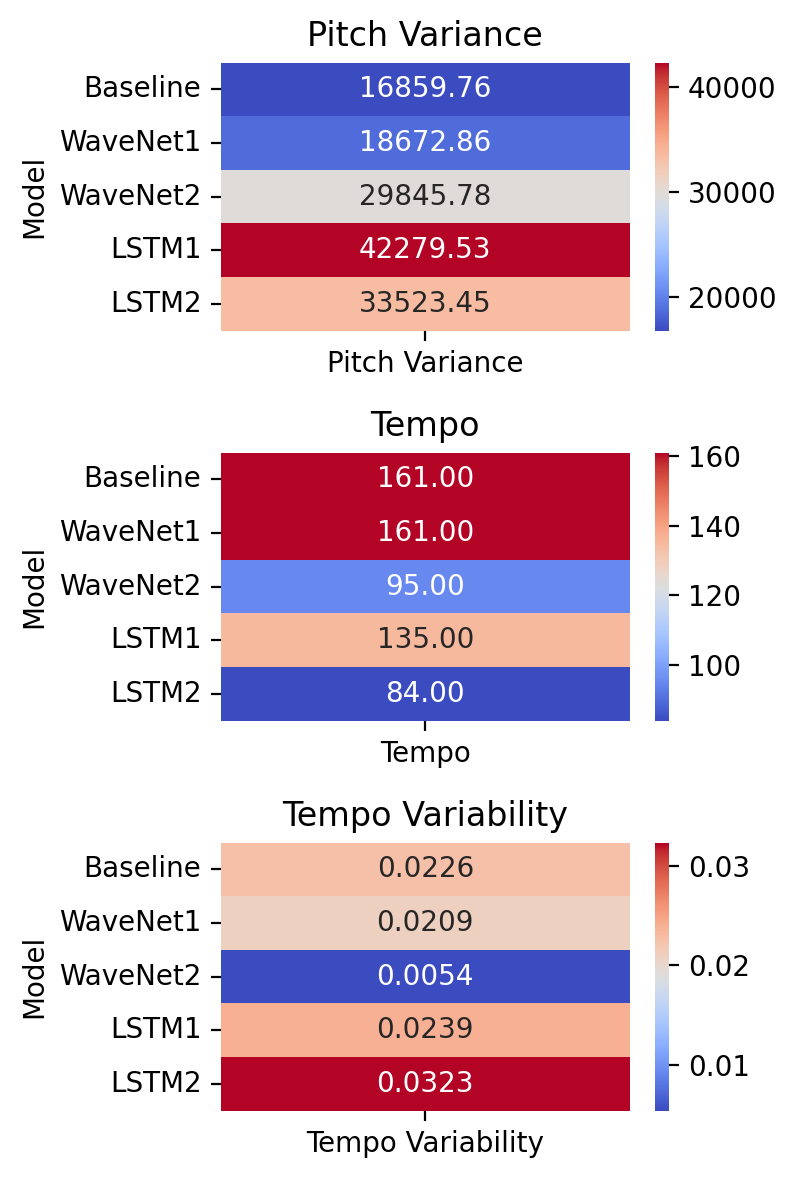

In [ ]:
pitch_variance_data = {
    'Model': ['Baseline', 'WaveNet1', 'WaveNet2', 'LSTM1', 'LSTM2'],
    'Pitch Variance': [16859.758, 18672.857, 29845.777, 42279.527, 33523.45]
}

tempo_data = {
    'Model': ['Baseline', 'WaveNet1', 'WaveNet2', 'LSTM1', 'LSTM2'],
    'Tempo': [161, 161, 95, 135, 84]
}

tempo_variability_data = {
    'Model': ['Baseline', 'WaveNet1', 'WaveNet2', 'LSTM1', 'LSTM2'],
    'Tempo Variability': [0.0226, 0.0209, 0.0054, 0.0239, 0.0323]
}

# Creating dataframes
df_pitch_variance = pd.DataFrame(pitch_variance_data).set_index('Model')
df_tempo = pd.DataFrame(tempo_data).set_index('Model')
df_tempo_variability = pd.DataFrame(tempo_variability_data).set_index('Model')

# Plotting the heatmaps
fig, axes = plt.subplots(3, 1, figsize=(4, 6))

sns.heatmap(df_pitch_variance, annot=True, cmap='coolwarm', fmt='.2f', ax=axes[0])
axes[0].set_title('Pitch Variance')

sns.heatmap(df_tempo, annot=True, cmap='coolwarm', fmt='.2f', ax=axes[1])
axes[1].set_title('Tempo')

sns.heatmap(df_tempo_variability, annot=True, cmap='coolwarm', fmt='.4f', ax=axes[2])
axes[2].set_title('Tempo Variability')

plt.tight_layout()
plt.show()


### Dominant Pitch Analysis Over Time
In this section, I'll analyze the dominant pitch across all the models over time. These plots represent how the primary pitch of the generated music varies as the track progresses. Observing these fluctuations offers insights into the models' capabilities to maintain coherent and melodious structures in the generated music.

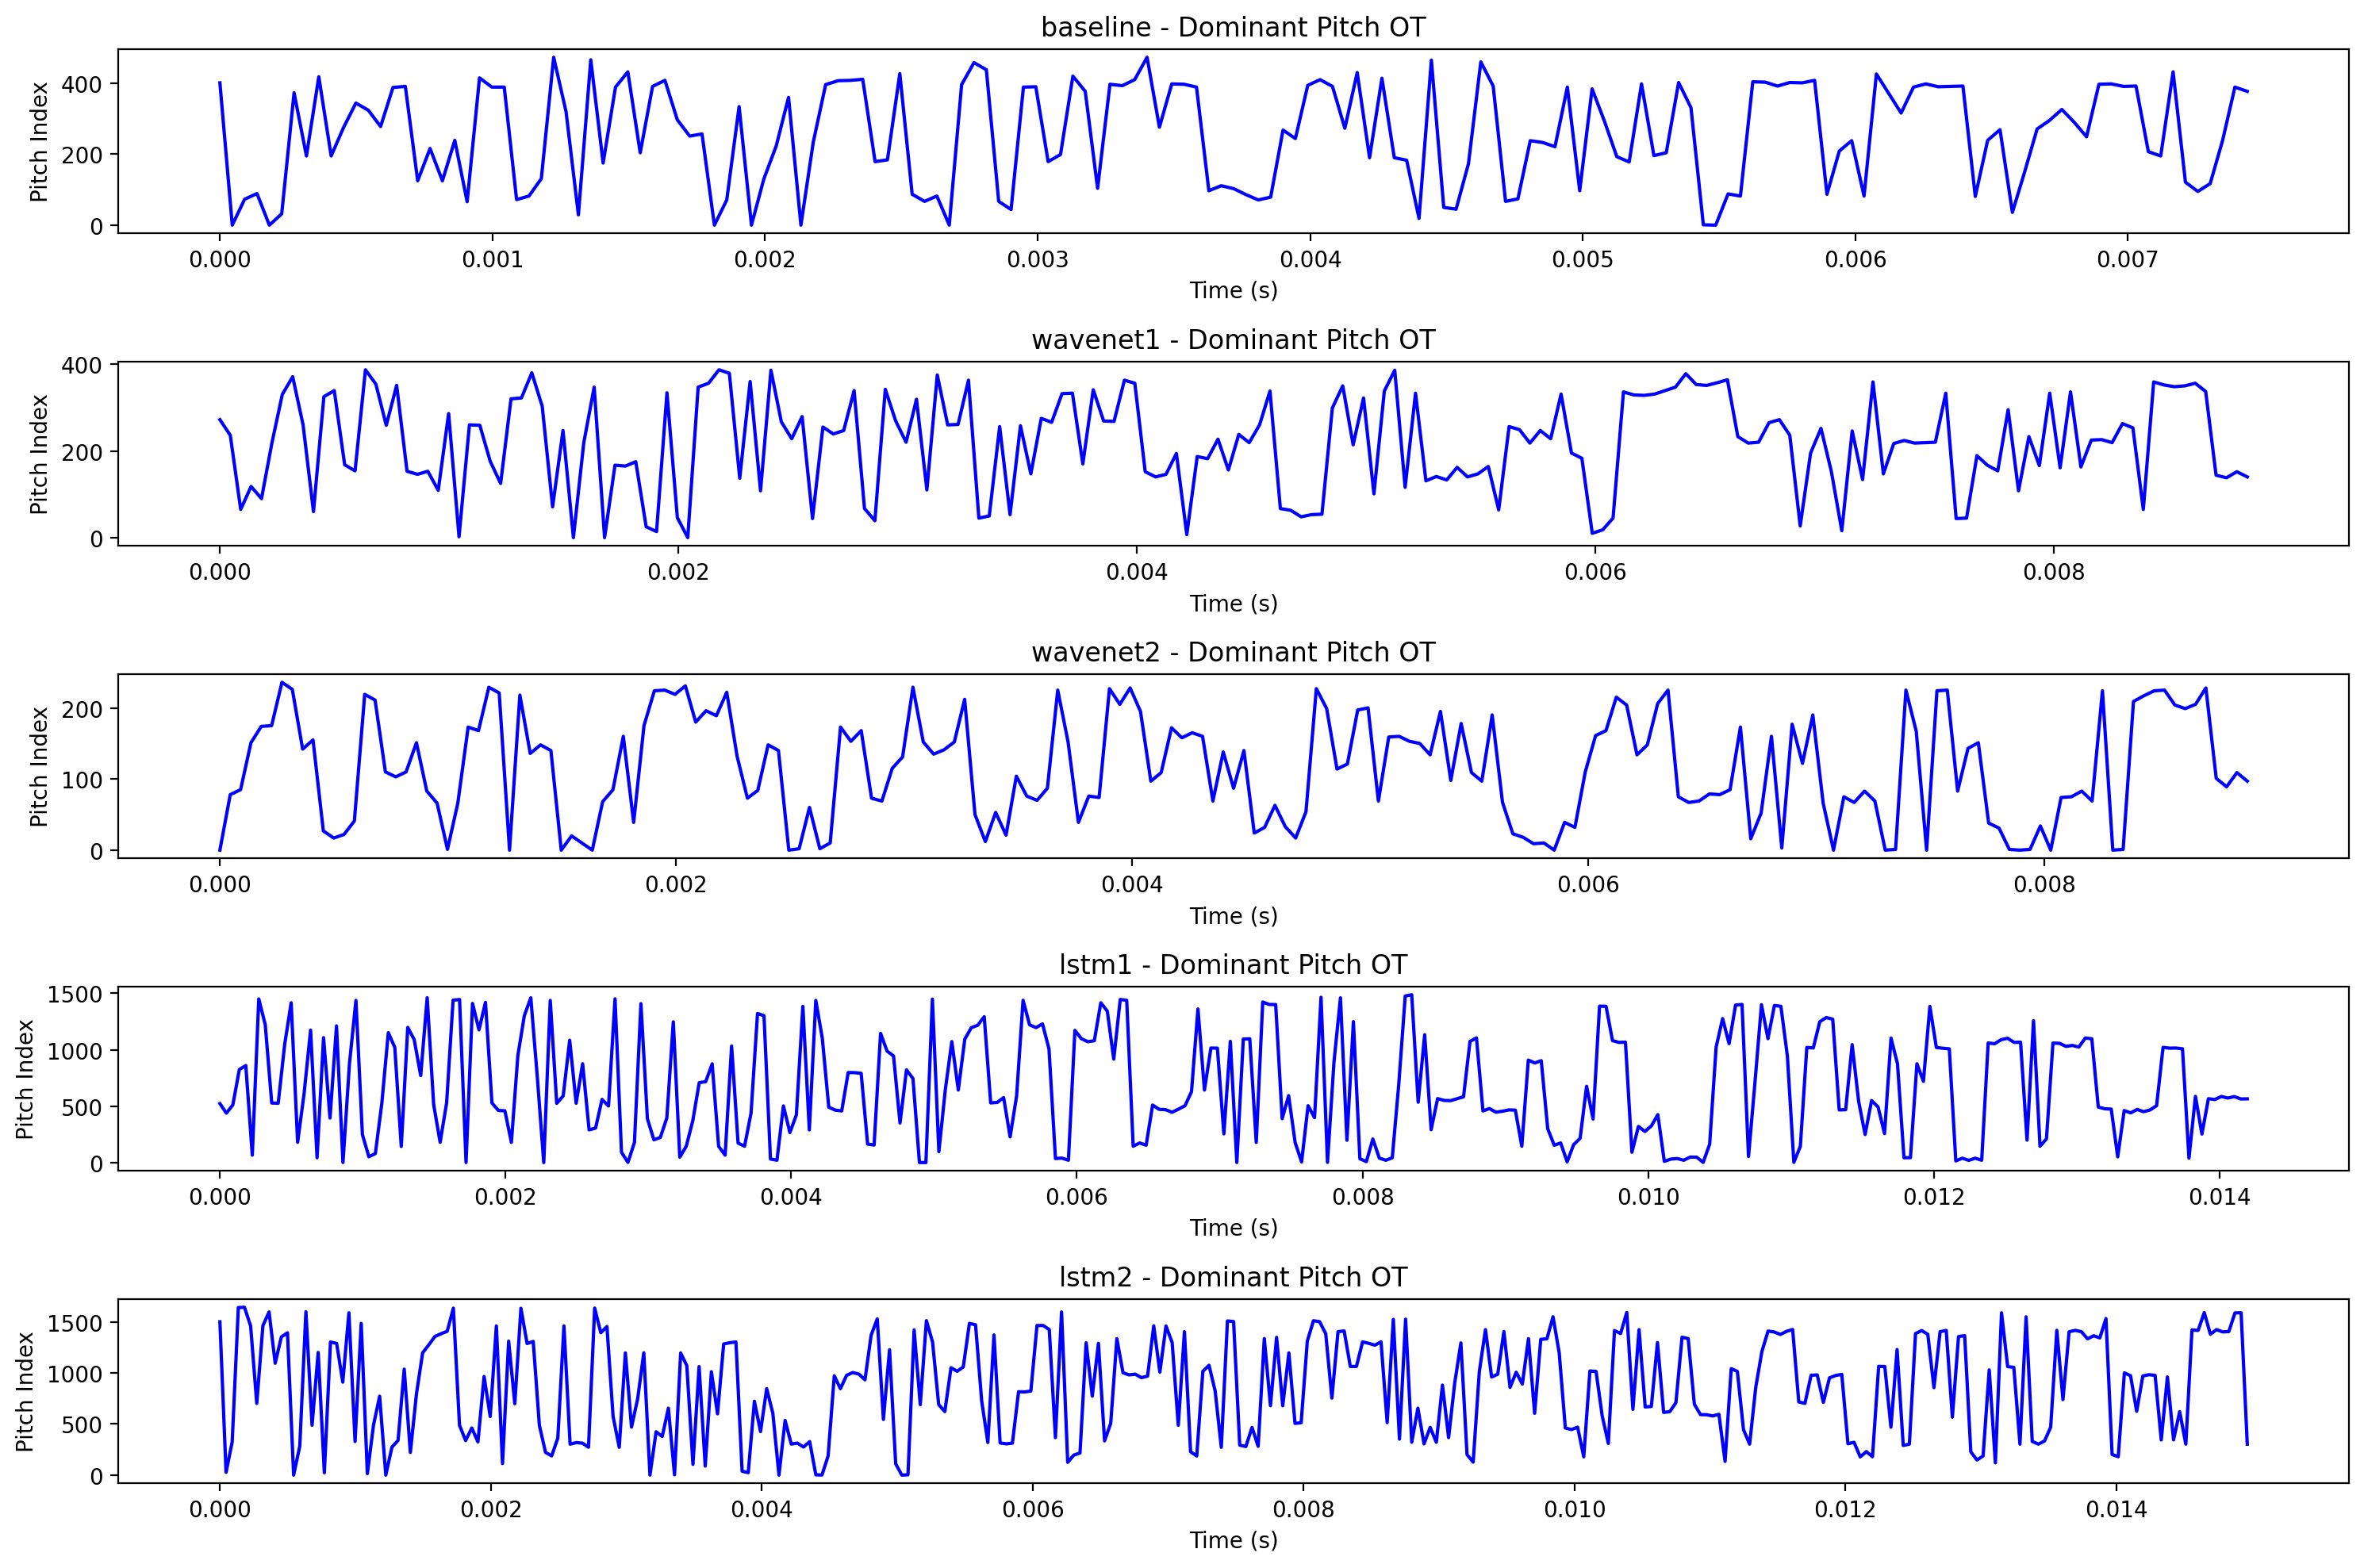

In [ ]:
def extract_pitch(file_path, sr=22050):
    y, sr = librosa.load(file_path, sr=sr)
    pitches, magnitudes = librosa.piptrack(y=y, sr=sr)
    return pitches, sr

def plot_pitch(pitches, sr, ax):
    # Check if pitches array is not empty
    if pitches.size > 0:
        # Get the index of the highest pitch in each time frame
        pitch_indices = np.argmax(pitches, axis=1)

        # Filter out frames with no significant pitch
        valid_frames = np.max(pitches, axis=1) > 0.1

        # Extract the pitch values for valid frames
        dominant_pitches = pitch_indices[valid_frames]
        times = np.arange(len(dominant_pitches)) / sr

        ax.plot(times, dominant_pitches, color='blue')
        ax.set_title(f'{model} - Dominant Pitch OT')
        ax.set_xlabel('Time (s)')
        ax.set_ylabel('Pitch Index')
    else:
        ax.set_title('No Pitch Detected')
        ax.set_xlabel('Time (s)')
        ax.set_ylabel('Pitch Index')

# Analyzing and plotting data for each model
models = ['baseline', 'wavenet1', 'wavenet2', 'lstm1', 'lstm2']
fig, axes = plt.subplots(len(models), 1, figsize=(15, 10))

for i, model in enumerate(models):
    file_path = f'/content/gdrive/MyDrive/model_wav_outputs/{model}.wav'

    # Extract and plot pitch data
    pitches, sr = extract_pitch(file_path)
    plot_pitch(pitches, sr, axes[i])

plt.tight_layout()
plt.show()


### Plotting Spectrograms
Next, we present spectrograms for each model's output. Spectrograms offer a visual representation of the spectrum of frequencies in the audio file as they vary over time. These visualizations help in understanding the texture and quality of the sound produced by each model.

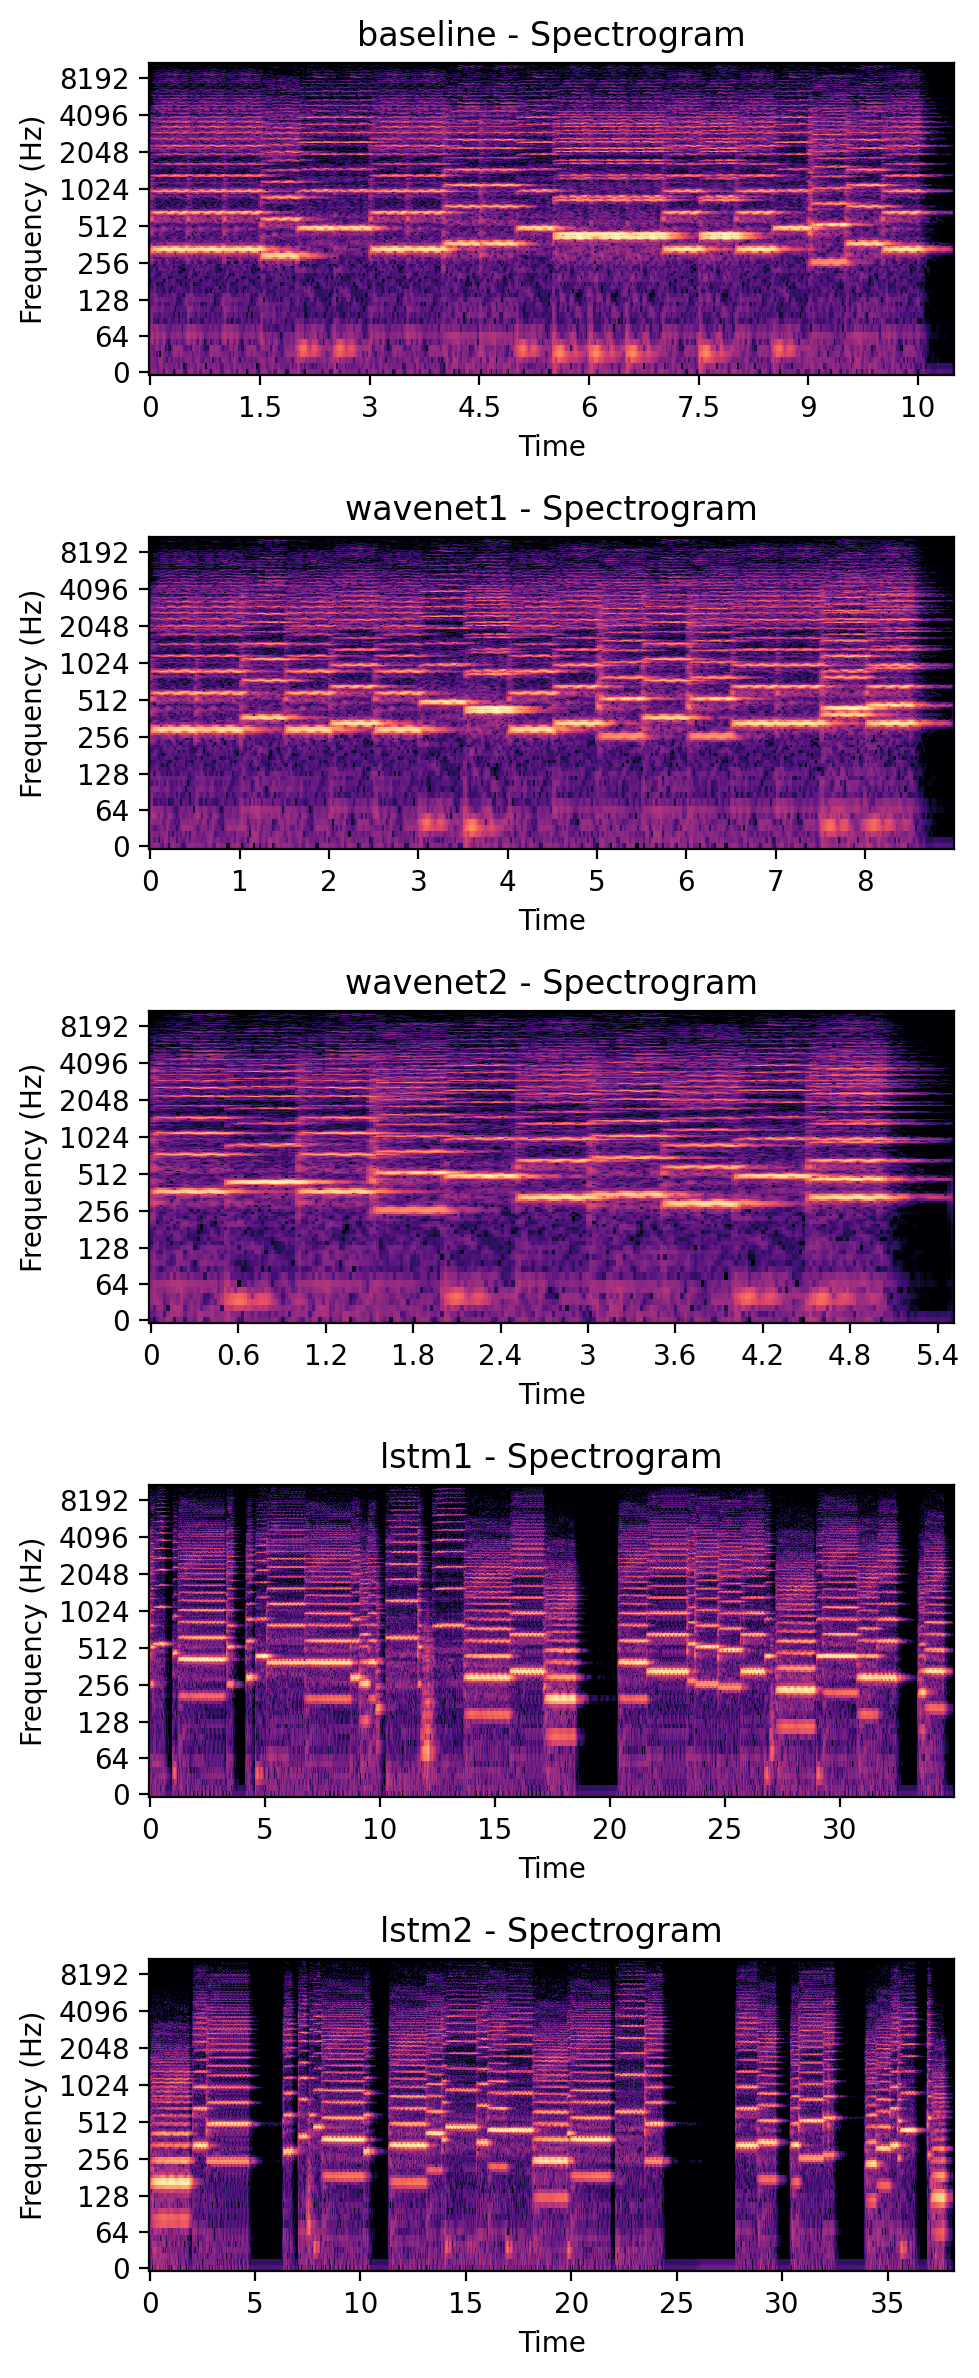

In [ ]:
def create_spectrogram(file_path, ax):
    # Load audio file
    y, sr = librosa.load(file_path)

    # Create a spectrogram
    S = librosa.amplitude_to_db(np.abs(librosa.stft(y)), ref=np.max)

    # Display
    librosa.display.specshow(S, sr=sr, x_axis='time', y_axis='log', ax=ax)
    ax.set_title(f'{model} - Spectrogram')
    ax.set_xlabel('Time')
    ax.set_ylabel('Frequency (Hz)')


models = ['baseline', 'wavenet1', 'wavenet2', 'lstm1', 'lstm2']

# Create subplots
fig, axes = plt.subplots(nrows=len(models), ncols=1, figsize=(5, 12))

for i, model in enumerate(models):
    file_path = f'/content/gdrive/MyDrive/model_wav_outputs/{model}.wav'
    create_spectrogram(file_path, axes[i])

# Adjust layout
plt.tight_layout()
plt.show()


## Conclusion
Based on this visual analysis, I will proceed with using the generated audio output from the 2nd WaveNet model as input for the Jukebox pre-trained model to get the final audio results.

# Proceed to 'Pretrained_Model_Jukebox.ipynb'
``` bash
├── AI_Violinist_Intro.ipynb                <- Data capture/project overview
├── Model_1_WaveNet.ipynb                   <- Baseline/WaveNet Models
├── Model_2_LSTM.ipynb                      <- First LSTM Model
├── Model_3__Complex_LSTM.ipynb             <- Second LSTM Model
├── Visual_Analysis_Model_Comparison.ipynb  <- Model Evaluation
├── Pretrained_Model_Jukebox.ipynb          <- Generating Final Music
└── Failed_Models_Spectrograms.ipynb        <- Failed attempts
```
